In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import seaborn as sns

In [2]:
import itertools
import matplotlib.gridspec as gridspec
import warnings

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import Perceptron
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse

from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

#stacking利器：
#绘制学习曲线
from mlxtend.plotting import plot_learning_curves
#画出logistic模型决策边界
from mlxtend.plotting import plot_decision_regions
%matplotlib inline

In [3]:
tips = sns.load_dataset("tips")

In [4]:
cols = ['tip','total_bill', 'sex', 'smoker', 'day', 'time','size']
tips_sub = pd.get_dummies(tips[cols].dropna(), drop_first=True)

X = tips_sub.drop('tip', axis=1)
y = tips_sub.tip

In [5]:
tips_sub

,tip,total_bill,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,1.01,16.99,2,1,1,0,0,1,1
1,1.66,10.34,3,0,1,0,0,1,1
2,3.50,21.01,3,0,1,0,0,1,1
3,3.31,23.68,2,0,1,0,0,1,1
4,3.61,24.59,4,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...
239,5.92,29.03,3,0,1,0,1,0,1
240,2.00,27.18,2,1,0,0,1,0,1
241,2.00,22.67,2,0,0,0,1,0,1
242,1.75,17.82,2,0,1,0,1,0,1


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=11193) # test的数量占总体的0.2

In [7]:
print(X_train)

     total_bill  size  sex_Female  smoker_No  day_Fri  day_Sat  day_Sun  \
35        24.06     3           0          1        0        1        0   
128       11.38     2           1          1        0        0        0   
37        16.93     3           1          1        0        1        0   
174       16.82     2           0          0        0        0        1   
5         25.29     4           0          1        0        0        1   
..          ...   ...         ...        ...      ...      ...      ...   
162       16.21     3           1          1        0        0        1   
33        20.69     4           1          1        0        1        0   
209       12.76     2           1          0        0        1        0   
4         24.59     4           1          1        0        0        1   
145        8.35     2           1          1        0        0        0   

     time_Dinner  
35             1  
128            0  
37             1  
174            1  
5   

In [8]:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [9]:
X_train.shape

(122, 8)

In [10]:
def net_input(X_, w_):    
    ''' Computes the matrix product between X and w. Note that
    X is assumed not to contain a bias/intercept column.'''
    return np.dot(X_, w_[1:]) + w_[0]   
# We have to add w_[0] separately because this is the constant term. 
# We could also have added a constant term (columns of 1's to X_ and multipliced it to all of w_)

def compute_error(y_, X_, w_):
    return y_ - net_input(X_, w_)

In [11]:
'''
# 这个函数的问题在于被调用的时候无法成功地使w更新
def update_weights(X_,y_,w_,eta,n_iter):
    counter = 0
    d_e = np.inf

    lRMSE_list = []
    w_list = []    

#    while d_e>0.1**6:
    for i in range(0,n_iter):  
        e = compute_error(y_,X_,w_)
        lRMSE = np.log(np.sqrt((e**2).mean()))
        
        w_[1:] += eta*X_.T.dot(e)
        w_[0] += eta*e.sum()

        e = compute_error(y_,X_,w_)
        d_e = lRMSE - np.log(np.sqrt((e**2).mean()))
        counter = counter+1

        lRMSE =  np.log(np.sqrt((e**2).mean()))
        lRMSE_list.append(lRMSE)
        w_list.append(w_)    
    
    return(w)
'''

'\n# 这个函数的问题在于被调用的时候无法成功地使w更新\ndef update_weights(X_,y_,w_,eta,n_iter):\n    counter = 0\n    d_e = np.inf\n\n    lRMSE_list = []\n    w_list = []    \n\n#    while d_e>0.1**6:\n    for i in range(0,n_iter):  \n        e = compute_error(y_,X_,w_)\n        lRMSE = np.log(np.sqrt((e**2).mean()))\n        \n        w_[1:] += eta*X_.T.dot(e)\n        w_[0] += eta*e.sum()\n\n        e = compute_error(y_,X_,w_)\n        d_e = lRMSE - np.log(np.sqrt((e**2).mean()))\n        counter = counter+1\n\n        lRMSE =  np.log(np.sqrt((e**2).mean()))\n        lRMSE_list.append(lRMSE)\n        w_list.append(w_)    \n    \n    return(w)\n'

In [12]:
'''
w = np.zeros(1+X_train.shape[1])
w1 = update_weights(X_train,y_train,w,0.001,50)
print(w1)
'''

'\nw = np.zeros(1+X_train.shape[1])\nw1 = update_weights(X_train,y_train,w,0.001,50)\nprint(w1)\n'

<AxesSubplot:>

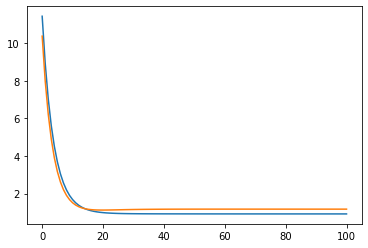

In [13]:
def MSE(y_,X_,w_):
    return (compute_error(y_, X_, w_)**2).mean()
    
w = np.zeros(1+X_train.shape[1])
MSE_train = [MSE(y_train, X_train, w)]
MSE_test = [MSE(y_test, X_test, w)]


for i in range(100):
    e = compute_error(y_train,X_train,w)        
    w[1:] += 0.001*X_train.T.dot(e)
    w[0] += 0.001*e.sum()

    e = compute_error(y_train,X_train,w)

    MSE_train.append(MSE(y_train, X_train, w))
    MSE_test.append(MSE(y_test, X_test, w))
### END SOLUTION

pd.Series(MSE_train).plot()
pd.Series(MSE_test).plot()

#### Exercise2

In [37]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

cal_house = fetch_california_housing()   

In [38]:
cal_house

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [39]:
X = pd.DataFrame(data=cal_house['data'], 
                 columns=cal_house['feature_names'])\
             .iloc[:,:-2] # 不知道为什么是-2
y = cal_house['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=1)

X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467
...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209


In [74]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [40]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [73]:
test_mse = []
train_mse = []
parameters = []


X_train_1 = PolynomialFeatures(degree=1).fit_transform(X_train) # poly. trans.
X_test_1 = PolynomialFeatures(degree=1).fit_transform(X_test) # poly. trans.
    
reg = LinearRegression().fit(X_train_1, y_train) # fit on train
    
train_mse.append(mse(reg.predict(X_train_1),y_train)) # eval. performance on train
test_mse.append(mse(reg.predict(X_test_1),y_test))  # eval. performance on test     
parameters.append(reg.coef_) # store parameters

Lasso1 = []
for i in np.logspace(-5.0, 5.0, num=10):
    Lasso = mse(reg.predict(X_train_1),y_train) + i*abs(np.sum(parameters) )
    Lasso1.append(Lasso)

print(Lasso1)
print()
print(train_mse,test_mse)
print()
print(parameters)

[0.6125831892114874, 0.6127213282794784, 0.6145054629493718, 0.6375484483017948, 0.9351600484304425, 4.778961672937424, 54.42356867809407, 695.608324151151, 8976.827885589912, 115932.89139049916]

[0.6125715959836054] [0.6149705900748272]

[array([ 0.        ,  0.99916425,  0.20934788, -0.50829258,  0.47279963,
        0.02161485, -0.03531124])]


In [66]:
test_mse = []
train_mse = []
parameters = []


X_train_2 = PolynomialFeatures(degree=2).fit_transform(X_train) # poly. trans.
X_test_2 = PolynomialFeatures(degree=2).fit_transform(X_test) # poly. trans.
    
reg = LinearRegression().fit(X_train_2, y_train) # fit on train
    
train_mse.append(mse(reg.predict(X_train_2),y_train)) # eval. performance on train
test_mse.append(mse(reg.predict(X_test_2),y_test))  # eval. performance on test     
parameters.append(reg.coef_) # store parameters

Lasso2 = []
for i in np.logspace(-5.0, 5.0, num=10):
    Lasso = mse(reg.predict(X_train_2),y_train) + i*abs(np.sum(parameters) )
    Lasso2.append(Lasso)

print(Lasso2)
print()
print(train_mse,test_mse)


[0.5161667003917535, 0.5163162264248655, 0.5182474294046348, 0.5431898750206013, 0.8653339478201382, 5.025984640927855, 58.76285473020009, 752.8012203576798, 9716.651406694158, 125489.2284607589]

[0.5161541515205228] [8.994128611092872]


In [67]:
test_mse = []
train_mse = []
parameters = []


X_train_3 = PolynomialFeatures(degree=3).fit_transform(X_train) # poly. trans.
X_test_3 = PolynomialFeatures(degree=3).fit_transform(X_test) # poly. trans.
    
reg = LinearRegression().fit(X_train_3, y_train) # fit on train
    
train_mse.append(mse(reg.predict(X_train_3),y_train)) # eval. performance on train
test_mse.append(mse(reg.predict(X_test_3),y_test))  # eval. performance on test     
parameters.append(reg.coef_) # store parameters

Lasso3 = []
for i in np.logspace(-5.0, 5.0, num=10):
    Lasso = mse(reg.predict(X_train_3),y_train) + i*abs(np.sum(parameters) )
    Lasso3.append(Lasso)

print(Lasso3)
print()
print(train_mse,test_mse)

[0.4327162247647304, 0.433055682986607, 0.4374399545141202, 0.4940649987410593, 1.225405567768621, 10.671032237162033, 132.66599184426934, 1708.2914839849084, 22058.277249616425, 284888.4502362066]

[0.43268773596297555] [643514.9503871889]


<AxesSubplot:>

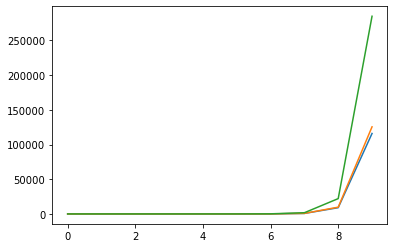

In [69]:
pd.Series(Lasso1).plot()
pd.Series(Lasso2).plot()
pd.Series(Lasso3).plot()

In [70]:
np.logspace(-5.0, 5.0, num=10) # lamda=46.42，即第7项时效果最佳

array([1.00000000e-05, 1.29154967e-04, 1.66810054e-03, 2.15443469e-02,
       2.78255940e-01, 3.59381366e+00, 4.64158883e+01, 5.99484250e+02,
       7.74263683e+03, 1.00000000e+05])

In [ ]:
# 按lamda=46.42时，degree=1的结果最小，与mse of train/test dataset的对比结果一致。但不明白，lamda和RMSE有关系吗？